In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
train_path="Fruits_Vegetables/train"
test_path="Fruits_Vegetables/test"
validation_path="Fruits_Vegetables/validation"

In [9]:
img_width= 180
img_height=180

In [12]:
data_train=tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size= 32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [15]:
data_cat=data_train.class_names


In [18]:
data_val=tf.keras.utils.image_dataset_from_directory(
    validation_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)
    

Found 351 files belonging to 36 classes.


In [21]:
data_test= tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 359 files belonging to 36 classes.


2025-04-09 23:36:35.289644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:36:35.649968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:36:36.483603: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


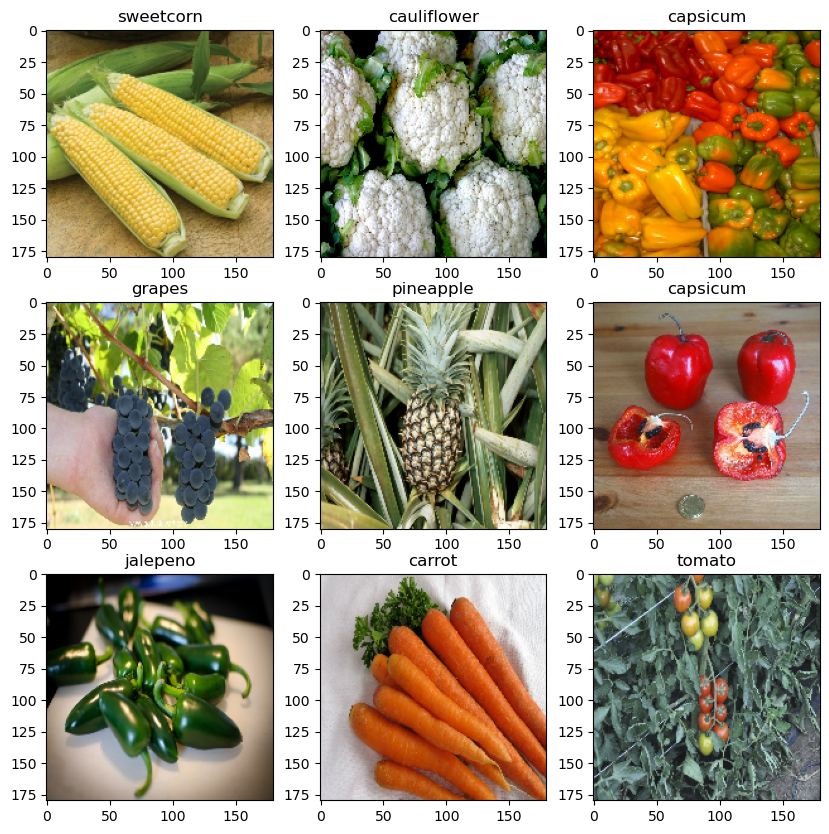

In [24]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        

In [27]:
from tensorflow.keras.models import Sequential

In [30]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding="same", activation= "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [33]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [55]:
epochs_size=25
hist = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25


2025-04-09 23:51:27.861554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 41s 423ms/step - accuracy: 1.0000 - loss: 0.0148

2025-04-09 23:51:28.142470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:28.151494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.9876 - loss: 0.0701

2025-04-09 23:51:28.568574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.9824 - loss: 0.0790

2025-04-09 23:51:29.852050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:30.031512: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9821 - loss: 0.0825

2025-04-09 23:51:30.363269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9818 - loss: 0.0856

2025-04-09 23:51:31.273589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9819 - loss: 0.0839

2025-04-09 23:51:33.684882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.9820 - loss: 0.0826

2025-04-09 23:51:35.483033: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:35.691399: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9824 - loss: 0.0799

2025-04-09 23:51:38.265517: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9824 - loss: 0.0795

2025-04-09 23:51:38.562864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9826 - loss: 0.0785

2025-04-09 23:51:39.362373: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9826 - loss: 0.0780

2025-04-09 23:51:39.643601: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:39.835393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9827 - loss: 0.0774

2025-04-09 23:51:40.136117: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9828 - loss: 0.0769

2025-04-09 23:51:40.637092: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9830 - loss: 0.0761

2025-04-09 23:51:41.427308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:41.445816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9831 - loss: 0.0756

2025-04-09 23:51:41.910205: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9832 - loss: 0.0748

2025-04-09 23:51:42.868046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:42.877169: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9834 - loss: 0.0740

2025-04-09 23:51:44.196879: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:44.383585: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.9834 - loss: 0.0738 - val_accuracy: 0.9601 - val_loss: 0.3967
Epoch 2/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 39s 407ms/step - accuracy: 0.9688 - loss: 0.0718

2025-04-09 23:51:45.278280: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:45.285885: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:45.588425: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:45.775115: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.9700 - loss: 0.1077

2025-04-09 23:51:47.044178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.9713 - loss: 0.1140

2025-04-09 23:51:48.027331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.9723 - loss: 0.1182

2025-04-09 23:51:49.406511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:49.566229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9739 - loss: 0.1138

2025-04-09 23:51:51.272821: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9747 - loss: 0.1110

2025-04-09 23:51:52.028857: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9750 - loss: 0.1098

2025-04-09 23:51:52.460518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9754 - loss: 0.1076

2025-04-09 23:51:53.612904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9755 - loss: 0.1070

2025-04-09 23:51:54.363720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9751 - loss: 0.1081

2025-04-09 23:51:55.382609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:55.524662: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9747 - loss: 0.1089

2025-04-09 23:51:56.394997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:56.405420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9745 - loss: 0.1093

2025-04-09 23:51:57.044434: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:57.200608: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.9737 - loss: 0.1103

2025-04-09 23:51:58.805024: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:51:58.968056: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.9736 - loss: 0.1105

2025-04-09 23:51:59.136474: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.9735 - loss: 0.1106

2025-04-09 23:51:59.423966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9729 - loss: 0.1116

2025-04-09 23:52:01.280488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:01.503630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9728 - loss: 0.1117 - val_accuracy: 0.9516 - val_loss: 0.4139
Epoch 3/25


2025-04-09 23:52:02.107542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:02.425772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9703 - loss: 0.1513

2025-04-09 23:52:03.244565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.9663 - loss: 0.1538

2025-04-09 23:52:03.757831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.9661 - loss: 0.1476

2025-04-09 23:52:04.325758: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:04.489118: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9670 - loss: 0.1392

2025-04-09 23:52:05.032928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.9696 - loss: 0.1252

2025-04-09 23:52:07.077140: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9699 - loss: 0.1223

2025-04-09 23:52:08.925598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.9698 - loss: 0.1222

2025-04-09 23:52:09.301409: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.9695 - loss: 0.1220

2025-04-09 23:52:10.167045: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.9695 - loss: 0.1214

2025-04-09 23:52:11.002001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9694 - loss: 0.1201

2025-04-09 23:52:12.429258: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:12.442562: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9694 - loss: 0.1200

2025-04-09 23:52:12.645213: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9694 - loss: 0.1198

2025-04-09 23:52:13.067181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9693 - loss: 0.1197

2025-04-09 23:52:13.437837: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:13.573950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9692 - loss: 0.1194

2025-04-09 23:52:14.284308: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9690 - loss: 0.1193

2025-04-09 23:52:14.965630: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9689 - loss: 0.1192

2025-04-09 23:52:15.576902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9688 - loss: 0.1193

2025-04-09 23:52:15.896068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9686 - loss: 0.1196

2025-04-09 23:52:16.474076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9680 - loss: 0.1213

2025-04-09 23:52:18.455190: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:18.660270: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9680 - loss: 0.1214 - val_accuracy: 0.9544 - val_loss: 0.4879
Epoch 4/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 33s 349ms/step - accuracy: 0.9688 - loss: 0.1422

2025-04-09 23:52:19.494978: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 24s 256ms/step - accuracy: 0.9766 - loss: 0.1191

2025-04-09 23:52:19.893603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:20.077003: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 33s 351ms/step - accuracy: 0.9705 - loss: 0.1227

2025-04-09 23:52:20.177584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.9536 - loss: 0.1716

2025-04-09 23:52:21.338176: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:21.390338: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:21.524565: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.9466 - loss: 0.2006

2025-04-09 23:52:23.172418: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.9433 - loss: 0.2046

2025-04-09 23:52:24.307351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9401 - loss: 0.2030 

2025-04-09 23:52:26.346810: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9395 - loss: 0.1995

2025-04-09 23:52:29.416997: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9395 - loss: 0.1991

2025-04-09 23:52:29.695191: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9396 - loss: 0.1987

2025-04-09 23:52:30.064367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9398 - loss: 0.1976

2025-04-09 23:52:30.716520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9399 - loss: 0.1970

2025-04-09 23:52:30.992733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9400 - loss: 0.1964

2025-04-09 23:52:31.337841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9403 - loss: 0.1948

2025-04-09 23:52:32.086785: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9406 - loss: 0.1938

2025-04-09 23:52:32.599924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:32.755781: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.9407 - loss: 0.1930

2025-04-09 23:52:33.136646: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:33.278457: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:33.309509: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.9410 - loss: 0.1919

2025-04-09 23:52:33.929138: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9414 - loss: 0.1900

2025-04-09 23:52:35.582013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:35.786010: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.9414 - loss: 0.1898 - val_accuracy: 0.9544 - val_loss: 0.4942
Epoch 5/25


2025-04-09 23:52:36.494666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:36.666971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 24s 256ms/step - accuracy: 0.9609 - loss: 0.1297

2025-04-09 23:52:36.981420: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 29s 313ms/step - accuracy: 0.9566 - loss: 0.1366

2025-04-09 23:52:37.294459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.9498 - loss: 0.1513

2025-04-09 23:52:37.768867: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.9544 - loss: 0.1630

2025-04-09 23:52:39.292063: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9550 - loss: 0.1622

2025-04-09 23:52:39.738620: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.9563 - loss: 0.1585

2025-04-09 23:52:40.576780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:40.764599: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9592 - loss: 0.1462

2025-04-09 23:52:42.797204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9596 - loss: 0.1443

2025-04-09 23:52:43.455071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.9603 - loss: 0.1411

2025-04-09 23:52:45.379321: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9608 - loss: 0.1394

2025-04-09 23:52:46.840696: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9609 - loss: 0.1389

2025-04-09 23:52:47.187828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:47.197403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9609 - loss: 0.1387

2025-04-09 23:52:47.396915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9610 - loss: 0.1383

2025-04-09 23:52:47.660483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9613 - loss: 0.1372

2025-04-09 23:52:48.278401: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9615 - loss: 0.1360

2025-04-09 23:52:49.270435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9616 - loss: 0.1356

2025-04-09 23:52:49.585594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9617 - loss: 0.1349

2025-04-09 23:52:50.200633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:50.219743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:50.220295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9622 - loss: 0.1323

2025-04-09 23:52:52.591901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:52.791151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9623 - loss: 0.1320 - val_accuracy: 0.9544 - val_loss: 0.5373
Epoch 6/25


2025-04-09 23:52:53.371484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:53.386199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:53.706487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:17 801ms/step - accuracy: 0.9688 - loss: 0.0831

2025-04-09 23:52:54.149244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:52:54.253178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.9478 - loss: 0.1199

2025-04-09 23:52:55.230216: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.9553 - loss: 0.1160

2025-04-09 23:52:56.384862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.9581 - loss: 0.1114

2025-04-09 23:52:56.902998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.9626 - loss: 0.1043

2025-04-09 23:52:57.941808: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9688 - loss: 0.0976

2025-04-09 23:53:00.909055: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.9704 - loss: 0.0943

2025-04-09 23:53:02.480071: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:02.614798: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9710 - loss: 0.0932

2025-04-09 23:53:03.073880: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9716 - loss: 0.0917

2025-04-09 23:53:04.120416: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:04.236305: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9717 - loss: 0.0912

2025-04-09 23:53:04.392905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9720 - loss: 0.0904

2025-04-09 23:53:04.969084: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9722 - loss: 0.0899

2025-04-09 23:53:05.282823: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9725 - loss: 0.0891

2025-04-09 23:53:05.751378: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9727 - loss: 0.0886

2025-04-09 23:53:06.023234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:06.040250: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9730 - loss: 0.0876

2025-04-09 23:53:06.690882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:06.873522: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9740 - loss: 0.0854

2025-04-09 23:53:09.755151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:09.949675: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.9741 - loss: 0.0854 - val_accuracy: 0.9573 - val_loss: 0.6204
Epoch 7/25


2025-04-09 23:53:10.551369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:10.650366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:10.746813: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 46s 475ms/step - accuracy: 1.0000 - loss: 0.0143

2025-04-09 23:53:11.166225: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 32s 344ms/step - accuracy: 0.9913 - loss: 0.4982

2025-04-09 23:53:11.634456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - accuracy: 0.9818 - loss: 0.4204

2025-04-09 23:53:12.633913: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9780 - loss: 0.3339

2025-04-09 23:53:14.191533: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.9779 - loss: 0.3198

2025-04-09 23:53:14.549178: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.9779 - loss: 0.2804

2025-04-09 23:53:15.629026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9778 - loss: 0.2453

2025-04-09 23:53:17.098983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9778 - loss: 0.2391

2025-04-09 23:53:17.432902: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9781 - loss: 0.2043

2025-04-09 23:53:19.777596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:19.890351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9784 - loss: 0.1872

2025-04-09 23:53:21.528752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9785 - loss: 0.1845

2025-04-09 23:53:21.967709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9785 - loss: 0.1807

2025-04-09 23:53:22.387863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9786 - loss: 0.1783

2025-04-09 23:53:22.718126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:22.730863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9787 - loss: 0.1739

2025-04-09 23:53:23.359306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:23.472832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9787 - loss: 0.1719

2025-04-09 23:53:23.629673: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9787 - loss: 0.1665

2025-04-09 23:53:24.635061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:24.795621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9789 - loss: 0.1562

2025-04-09 23:53:26.945091: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:27.153435: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9789 - loss: 0.1555 - val_accuracy: 0.9601 - val_loss: 0.5074
Epoch 8/25


2025-04-09 23:53:27.768762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:27.783031: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 42s 436ms/step - accuracy: 0.9375 - loss: 0.1256

2025-04-09 23:53:27.994229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.9488 - loss: 0.1408

2025-04-09 23:53:28.723195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.9615 - loss: 0.1255

2025-04-09 23:53:30.116508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9630 - loss: 0.1203

2025-04-09 23:53:31.236240: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:31.430459: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.9647 - loss: 0.1149

2025-04-09 23:53:32.035275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.9691 - loss: 0.0994

2025-04-09 23:53:35.331861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9714 - loss: 0.0918

2025-04-09 23:53:38.008366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9720 - loss: 0.0901

2025-04-09 23:53:38.840862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:38.848101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9723 - loss: 0.0894

2025-04-09 23:53:39.080650: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:39.125856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9729 - loss: 0.0876

2025-04-09 23:53:39.942417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:40.089195: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:40.109206: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9732 - loss: 0.0866

2025-04-09 23:53:40.435413: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9736 - loss: 0.0856

2025-04-09 23:53:40.939149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:41.059264: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9743 - loss: 0.0833

2025-04-09 23:53:42.165676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:42.357677: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9746 - loss: 0.0822

2025-04-09 23:53:42.811709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9751 - loss: 0.0808

2025-04-09 23:53:44.043348: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:44.242591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9751 - loss: 0.0806 - val_accuracy: 0.9601 - val_loss: 0.4433
Epoch 9/25


2025-04-09 23:53:44.929926: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:45.043598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:45.061761: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:45.103654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.9835 - loss: 0.0646

2025-04-09 23:53:46.001996: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9759 - loss: 0.0918

2025-04-09 23:53:47.129214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.9737 - loss: 0.0988

2025-04-09 23:53:47.757039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.9730 - loss: 0.1016

2025-04-09 23:53:48.169998: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.9709 - loss: 0.1074

2025-04-09 23:53:50.265203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9708 - loss: 0.1070

2025-04-09 23:53:51.945602: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.9711 - loss: 0.1049

2025-04-09 23:53:54.113148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:54.264619: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.9713 - loss: 0.1038

2025-04-09 23:53:54.834649: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9714 - loss: 0.1031

2025-04-09 23:53:55.293648: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9716 - loss: 0.1019

2025-04-09 23:53:56.100004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9717 - loss: 0.1011

2025-04-09 23:53:56.622816: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:56.759232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9720 - loss: 0.0997

2025-04-09 23:53:57.394836: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9722 - loss: 0.0992

2025-04-09 23:53:57.718511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:53:57.870887: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9723 - loss: 0.0986

2025-04-09 23:53:58.025929: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9725 - loss: 0.0978

2025-04-09 23:53:58.570920: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9728 - loss: 0.0965

2025-04-09 23:53:59.351266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9732 - loss: 0.0944

2025-04-09 23:54:01.122422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:01.331723: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9734 - loss: 0.0940 - val_accuracy: 0.9658 - val_loss: 0.4709
Epoch 10/25


2025-04-09 23:54:02.160791: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 58s 599ms/step - accuracy: 0.9688 - loss: 0.1757

2025-04-09 23:54:02.467422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:02.618928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.9550 - loss: 0.2089

2025-04-09 23:54:03.142593: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.9596 - loss: 0.1885

2025-04-09 23:54:03.491477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.9646 - loss: 0.1610

2025-04-09 23:54:04.134864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.9705 - loss: 0.1314

2025-04-09 23:54:05.457807: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:05.597424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.9752 - loss: 0.1065

2025-04-09 23:54:07.649719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9762 - loss: 0.1011

2025-04-09 23:54:09.104644: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9778 - loss: 0.0947

2025-04-09 23:54:11.528490: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.9779 - loss: 0.0940

2025-04-09 23:54:11.880539: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9781 - loss: 0.0928

2025-04-09 23:54:12.478254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9782 - loss: 0.0921

2025-04-09 23:54:12.997575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9783 - loss: 0.0910

2025-04-09 23:54:13.811690: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9783 - loss: 0.0904

2025-04-09 23:54:14.290523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9785 - loss: 0.0894

2025-04-09 23:54:15.045189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9785 - loss: 0.0890

2025-04-09 23:54:15.349707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:15.525035: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9786 - loss: 0.0886

2025-04-09 23:54:15.701632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9786 - loss: 0.0882

2025-04-09 23:54:16.061633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9787 - loss: 0.0878

2025-04-09 23:54:16.379307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9788 - loss: 0.0874

2025-04-09 23:54:16.661746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9790 - loss: 0.0857

2025-04-09 23:54:18.230456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:18.438089: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9790 - loss: 0.0855 - val_accuracy: 0.9658 - val_loss: 0.4267
Epoch 11/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 1.0000 - loss: 0.0140

2025-04-09 23:54:19.331076: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.9922 - loss: 0.0676

2025-04-09 23:54:19.555718: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:19.829047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:19.848235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 31s 331ms/step - accuracy: 0.9805 - loss: 0.1239

2025-04-09 23:54:20.244633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.9771 - loss: 0.1296

2025-04-09 23:54:21.043316: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9774 - loss: 0.1221

2025-04-09 23:54:21.613783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.9774 - loss: 0.1154

2025-04-09 23:54:22.039236: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.9808 - loss: 0.0905

2025-04-09 23:54:24.315534: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9819 - loss: 0.0768

2025-04-09 23:54:28.051098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.9821 - loss: 0.0750

2025-04-09 23:54:28.886556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:28.984950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.9821 - loss: 0.0744

2025-04-09 23:54:29.148023: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:29.297811: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9821 - loss: 0.0738

2025-04-09 23:54:29.461310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9820 - loss: 0.0730

2025-04-09 23:54:30.069841: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:30.099901: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9820 - loss: 0.0724

2025-04-09 23:54:30.785708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.9819 - loss: 0.0719

2025-04-09 23:54:31.563731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:31.683770: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.9819 - loss: 0.0717

2025-04-09 23:54:31.884703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9818 - loss: 0.0718

2025-04-09 23:54:32.277655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:32.462660: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9816 - loss: 0.0718

2025-04-09 23:54:35.293610: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:35.500235: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9815 - loss: 0.0718 - val_accuracy: 0.9601 - val_loss: 0.4471
Epoch 12/25


2025-04-09 23:54:36.088505: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:36.410832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:36.683462: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.9931 - loss: 0.0457

2025-04-09 23:54:37.063766: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.9873 - loss: 0.0627

2025-04-09 23:54:38.204925: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9861 - loss: 0.0613

2025-04-09 23:54:38.916954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9860 - loss: 0.0580

2025-04-09 23:54:40.659497: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:40.688639: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9861 - loss: 0.0573

2025-04-09 23:54:40.994252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.9863 - loss: 0.0560

2025-04-09 23:54:43.353499: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.9863 - loss: 0.0555

2025-04-09 23:54:43.979780: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.9865 - loss: 0.0548

2025-04-09 23:54:45.163958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9867 - loss: 0.0534

2025-04-09 23:54:47.008450: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9867 - loss: 0.0530

2025-04-09 23:54:47.704927: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:47.819990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9867 - loss: 0.0528

2025-04-09 23:54:47.970370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9867 - loss: 0.0526

2025-04-09 23:54:48.265488: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:48.308769: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9867 - loss: 0.0525

2025-04-09 23:54:48.614276: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:48.798066: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9867 - loss: 0.0522

2025-04-09 23:54:49.072323: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:49.076422: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9867 - loss: 0.0520

2025-04-09 23:54:49.634787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9867 - loss: 0.0508

2025-04-09 23:54:52.381967: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:52.599386: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9866 - loss: 0.0507 - val_accuracy: 0.9601 - val_loss: 0.4869
Epoch 13/25


2025-04-09 23:54:53.167820: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.9879 - loss: 0.0347

2025-04-09 23:54:54.270621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:54.450831: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9806 - loss: 0.0688

2025-04-09 23:54:54.743046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:54:54.760882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9803 - loss: 0.0744

2025-04-09 23:54:55.571852: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.9816 - loss: 0.0706

2025-04-09 23:54:56.400330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9835 - loss: 0.0638

2025-04-09 23:54:58.131307: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9842 - loss: 0.0590

2025-04-09 23:54:59.959211: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:00.141924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9847 - loss: 0.0564

2025-04-09 23:55:01.535809: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9850 - loss: 0.0548

2025-04-09 23:55:02.477245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9851 - loss: 0.0542

2025-04-09 23:55:03.123888: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9852 - loss: 0.0536

2025-04-09 23:55:03.917397: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9855 - loss: 0.0521

2025-04-09 23:55:05.691417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9856 - loss: 0.0516

2025-04-09 23:55:06.157822: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:06.176472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9856 - loss: 0.0513

2025-04-09 23:55:06.435333: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:06.640633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9857 - loss: 0.0508

2025-04-09 23:55:07.061037: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:07.218728: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9858 - loss: 0.0503

2025-04-09 23:55:07.780135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:07.915406: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9860 - loss: 0.0495

2025-04-09 23:55:09.361266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:09.559556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.9860 - loss: 0.0494 - val_accuracy: 0.9601 - val_loss: 0.4754
Epoch 14/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 34s 356ms/step - accuracy: 1.0000 - loss: 0.0037

2025-04-09 23:55:10.382241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:10.419638: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:10.492666: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 0.9954 - loss: 0.0622

2025-04-09 23:55:11.063919: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:11.246272: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 16s 192ms/step - accuracy: 0.9901 - loss: 0.0893

2025-04-09 23:55:12.472007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9903 - loss: 0.0707

2025-04-09 23:55:15.512942: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:15.637848: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9903 - loss: 0.0640

2025-04-09 23:55:17.222856: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.9902 - loss: 0.0628

2025-04-09 23:55:17.682172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:17.845099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.9902 - loss: 0.0581

2025-04-09 23:55:20.195439: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:20.234792: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9902 - loss: 0.0577

2025-04-09 23:55:20.500540: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9901 - loss: 0.0556

2025-04-09 23:55:22.124720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9901 - loss: 0.0550

2025-04-09 23:55:22.611405: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:22.635632: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9901 - loss: 0.0546

2025-04-09 23:55:22.914993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9900 - loss: 0.0541

2025-04-09 23:55:23.428160: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:23.436993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9900 - loss: 0.0535

2025-04-09 23:55:24.034219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9900 - loss: 0.0532

2025-04-09 23:55:24.522375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9899 - loss: 0.0529

2025-04-09 23:55:24.814740: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9899 - loss: 0.0522

2025-04-09 23:55:26.269938: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:26.465588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9899 - loss: 0.0520 - val_accuracy: 0.9573 - val_loss: 0.5218
Epoch 15/25


2025-04-09 23:55:27.087363: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 1.0000 - loss: 0.0190

2025-04-09 23:55:27.473680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:27.597151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.9872 - loss: 0.0632

2025-04-09 23:55:29.154238: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:29.304481: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9869 - loss: 0.0616

2025-04-09 23:55:29.608164: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:29.630987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9870 - loss: 0.0598

2025-04-09 23:55:29.959194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9880 - loss: 0.0488

2025-04-09 23:55:32.564754: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9883 - loss: 0.0446

2025-04-09 23:55:34.540311: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9886 - loss: 0.0423

2025-04-09 23:55:36.133523: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9887 - loss: 0.0416

2025-04-09 23:55:36.924271: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9887 - loss: 0.0412

2025-04-09 23:55:37.547730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9888 - loss: 0.0409

2025-04-09 23:55:37.883702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9888 - loss: 0.0402

2025-04-09 23:55:39.135068: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:39.137592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9888 - loss: 0.0400

2025-04-09 23:55:39.499358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9888 - loss: 0.0398

2025-04-09 23:55:40.101017: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9888 - loss: 0.0397

2025-04-09 23:55:40.333767: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9888 - loss: 0.0396

2025-04-09 23:55:40.654514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:40.804679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9888 - loss: 0.0395

2025-04-09 23:55:41.008598: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.9888 - loss: 0.0393

2025-04-09 23:55:41.766737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9888 - loss: 0.0389

2025-04-09 23:55:43.328796: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:43.515026: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9888 - loss: 0.0389 - val_accuracy: 0.9544 - val_loss: 0.5055
Epoch 16/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - accuracy: 0.9766 - loss: 0.1494

2025-04-09 23:55:44.517603: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:44.682417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.9786 - loss: 0.1098

2025-04-09 23:55:46.125720: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:46.148150: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9784 - loss: 0.1021

2025-04-09 23:55:46.960116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:47.147506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9797 - loss: 0.0906

2025-04-09 23:55:48.280703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9812 - loss: 0.0807

2025-04-09 23:55:49.852698: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9814 - loss: 0.0784

2025-04-09 23:55:50.320081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.9817 - loss: 0.0757

2025-04-09 23:55:50.983498: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.9823 - loss: 0.0700

2025-04-09 23:55:52.548465: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.9827 - loss: 0.0675

2025-04-09 23:55:53.518278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:53.661730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9830 - loss: 0.0648

2025-04-09 23:55:55.254805: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:55.452116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9831 - loss: 0.0639

2025-04-09 23:55:56.117295: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9831 - loss: 0.0635

2025-04-09 23:55:56.373669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9831 - loss: 0.0632

2025-04-09 23:55:56.769487: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:55:56.951121: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9832 - loss: 0.0624

2025-04-09 23:55:57.356109: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9832 - loss: 0.0622

2025-04-09 23:55:57.577530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9833 - loss: 0.0614

2025-04-09 23:55:58.304090: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9833 - loss: 0.0607

2025-04-09 23:55:59.010609: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9834 - loss: 0.0598

2025-04-09 23:56:00.389128: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:00.589708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9835 - loss: 0.0594 - val_accuracy: 0.9630 - val_loss: 0.4716
Epoch 17/25


2025-04-09 23:56:01.170860: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:01.434231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:21 840ms/step - accuracy: 1.0000 - loss: 0.0037

2025-04-09 23:56:01.936977: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.9792 - loss: 0.0428

2025-04-09 23:56:02.186676: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9788 - loss: 0.0480

2025-04-09 23:56:04.035861: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9798 - loss: 0.0461

2025-04-09 23:56:04.506231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9808 - loss: 0.0443

2025-04-09 23:56:05.041151: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.9817 - loss: 0.0426

2025-04-09 23:56:05.653906: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:05.690174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.9838 - loss: 0.0380

2025-04-09 23:56:07.903750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:07.904360: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9851 - loss: 0.0360

2025-04-09 23:56:10.035259: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9856 - loss: 0.0356

2025-04-09 23:56:11.451059: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9858 - loss: 0.0354

2025-04-09 23:56:12.259014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9860 - loss: 0.0351

2025-04-09 23:56:13.050388: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9861 - loss: 0.0350

2025-04-09 23:56:13.382968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:13.537737: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9863 - loss: 0.0347

2025-04-09 23:56:14.149990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:14.168621: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:14.189148: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9866 - loss: 0.0346

2025-04-09 23:56:14.950433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:15.112352: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9867 - loss: 0.0344

2025-04-09 23:56:15.620659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9871 - loss: 0.0343

2025-04-09 23:56:17.549001: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:17.757567: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9871 - loss: 0.0342 - val_accuracy: 0.9573 - val_loss: 0.5377
Epoch 18/25


2025-04-09 23:56:18.460248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.9818 - loss: 0.0946

2025-04-09 23:56:19.258368: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.9805 - loss: 0.0935

2025-04-09 23:56:19.482746: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - accuracy: 0.9801 - loss: 0.0909

2025-04-09 23:56:19.845889: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.9807 - loss: 0.0816

2025-04-09 23:56:20.417208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.9814 - loss: 0.0777

2025-04-09 23:56:20.756513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:20.766659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9859 - loss: 0.0526

2025-04-09 23:56:25.281183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:25.315863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.9861 - loss: 0.0510

2025-04-09 23:56:26.275220: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.9862 - loss: 0.0506

2025-04-09 23:56:26.554993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.9865 - loss: 0.0494

2025-04-09 23:56:27.648349: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:27.776194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9868 - loss: 0.0477

2025-04-09 23:56:29.574389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:29.693989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9869 - loss: 0.0474

2025-04-09 23:56:29.855194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9870 - loss: 0.0466

2025-04-09 23:56:30.700762: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9871 - loss: 0.0463

2025-04-09 23:56:31.190692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:31.365105: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9872 - loss: 0.0460

2025-04-09 23:56:31.503624: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:31.511475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9873 - loss: 0.0454

2025-04-09 23:56:32.281254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9874 - loss: 0.0450

2025-04-09 23:56:33.063383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9875 - loss: 0.0444

2025-04-09 23:56:34.495931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:34.711463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9875 - loss: 0.0444 - val_accuracy: 0.9516 - val_loss: 0.5247
Epoch 19/25


2025-04-09 23:56:35.377383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.9766 - loss: 0.2254

2025-04-09 23:56:35.755786: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.9768 - loss: 0.1593

2025-04-09 23:56:36.278231: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:36.426326: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:36.428290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9780 - loss: 0.1092

2025-04-09 23:56:37.397099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:37.558750: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.9820 - loss: 0.0743

2025-04-09 23:56:39.697964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.9831 - loss: 0.0680

2025-04-09 23:56:40.494467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.9843 - loss: 0.0604

2025-04-09 23:56:42.148931: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.9845 - loss: 0.0594

2025-04-09 23:56:42.493787: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.9856 - loss: 0.0536

2025-04-09 23:56:44.548294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9862 - loss: 0.0508

2025-04-09 23:56:46.019424: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9864 - loss: 0.0500

2025-04-09 23:56:46.518483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9866 - loss: 0.0490

2025-04-09 23:56:47.373189: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:47.486046: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9867 - loss: 0.0485

2025-04-09 23:56:47.819763: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:47.979039: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:47.992689: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9869 - loss: 0.0475

2025-04-09 23:56:48.741159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:48.779883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9870 - loss: 0.0470

2025-04-09 23:56:49.236101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9870 - loss: 0.0465

2025-04-09 23:56:49.852508: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9872 - loss: 0.0454

2025-04-09 23:56:51.549872: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:51.746015: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9872 - loss: 0.0453 - val_accuracy: 0.9573 - val_loss: 0.5485
Epoch 20/25
 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - accuracy: 0.9554 - loss: 0.0935

2025-04-09 23:56:53.231393: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9700 - loss: 0.0723

2025-04-09 23:56:54.291070: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:54.302970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:54.310842: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:54.493527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9771 - loss: 0.0620

2025-04-09 23:56:55.623256: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:55.641081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.9818 - loss: 0.0521

2025-04-09 23:56:57.834741: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9830 - loss: 0.0492

2025-04-09 23:56:59.779594: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:56:59.804355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9839 - loss: 0.0471

2025-04-09 23:57:02.182463: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:02.285123: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9841 - loss: 0.0466

2025-04-09 23:57:03.117575: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9843 - loss: 0.0462

2025-04-09 23:57:03.892636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:03.925192: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9843 - loss: 0.0461

2025-04-09 23:57:04.095000: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9844 - loss: 0.0459

2025-04-09 23:57:04.579095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:04.646804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:04.772550: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.9844 - loss: 0.0459

2025-04-09 23:57:05.378008: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9844 - loss: 0.0459

2025-04-09 23:57:05.952433: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:06.150894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9845 - loss: 0.0458

2025-04-09 23:57:06.897614: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9845 - loss: 0.0457

2025-04-09 23:57:08.454113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:08.638578: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9845 - loss: 0.0457 - val_accuracy: 0.9573 - val_loss: 0.5029
Epoch 21/25


2025-04-09 23:57:09.258574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 40s 422ms/step - accuracy: 1.0000 - loss: 0.0031

2025-04-09 23:57:09.473804: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 1.0000 - loss: 0.0049

2025-04-09 23:57:09.836146: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:09.904254: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - accuracy: 0.9919 - loss: 0.0234

2025-04-09 23:57:10.188845: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9864 - loss: 0.0414

2025-04-09 23:57:11.836583: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.9873 - loss: 0.0421

2025-04-09 23:57:13.529369: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9874 - loss: 0.0419

2025-04-09 23:57:13.744528: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9881 - loss: 0.0414

2025-04-09 23:57:15.261733: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.9878 - loss: 0.0427

2025-04-09 23:57:17.282252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.9878 - loss: 0.0430

2025-04-09 23:57:17.578774: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9876 - loss: 0.0440

2025-04-09 23:57:18.712588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9871 - loss: 0.0458

2025-04-09 23:57:20.816958: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9871 - loss: 0.0460

2025-04-09 23:57:21.103709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:21.145310: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9871 - loss: 0.0461

2025-04-09 23:57:21.409013: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9870 - loss: 0.0464

2025-04-09 23:57:21.727095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:21.860113: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9869 - loss: 0.0469

2025-04-09 23:57:22.319116: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:22.462476: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:22.473484: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9869 - loss: 0.0472

2025-04-09 23:57:22.813551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9868 - loss: 0.0478

2025-04-09 23:57:23.978784: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9867 - loss: 0.0482

2025-04-09 23:57:25.341199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:25.545695: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9867 - loss: 0.0483 - val_accuracy: 0.9573 - val_loss: 0.5089
Epoch 22/25


2025-04-09 23:57:26.132642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:26.240846: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - accuracy: 1.0000 - loss: 0.0126

2025-04-09 23:57:26.452633: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - accuracy: 1.0000 - loss: 0.0137

2025-04-09 23:57:26.904351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:26.906572: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.9893 - loss: 0.0391

2025-04-09 23:57:29.295520: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:29.490314: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.9879 - loss: 0.0443

2025-04-09 23:57:31.287730: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:31.438185: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.9873 - loss: 0.0462

2025-04-09 23:57:32.410900: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9868 - loss: 0.0475

2025-04-09 23:57:34.437453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.9867 - loss: 0.0476

2025-04-09 23:57:35.222182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9867 - loss: 0.0486

2025-04-09 23:57:36.252748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:36.404506: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9865 - loss: 0.0494

2025-04-09 23:57:37.266230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9865 - loss: 0.0496

2025-04-09 23:57:37.592748: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9865 - loss: 0.0500

2025-04-09 23:57:38.233241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9864 - loss: 0.0502

2025-04-09 23:57:38.654204: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9864 - loss: 0.0505

2025-04-09 23:57:39.425404: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9863 - loss: 0.0508

2025-04-09 23:57:40.055202: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:40.090835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:40.093052: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9862 - loss: 0.0512

2025-04-09 23:57:40.605209: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9860 - loss: 0.0522

2025-04-09 23:57:42.316636: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:42.499826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9859 - loss: 0.0523 - val_accuracy: 0.9544 - val_loss: 0.4228
Epoch 23/25


2025-04-09 23:57:43.331995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:43.366290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 54s 558ms/step - accuracy: 0.9688 - loss: 0.0833

2025-04-09 23:57:43.585783: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.9802 - loss: 0.0672

2025-04-09 23:57:44.890580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:45.017625: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9795 - loss: 0.0716

2025-04-09 23:57:45.155965: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:45.170725: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9799 - loss: 0.0789

2025-04-09 23:57:48.530928: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.9809 - loss: 0.0758

2025-04-09 23:57:50.175515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.9810 - loss: 0.0753

2025-04-09 23:57:50.521829: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9817 - loss: 0.0721

2025-04-09 23:57:52.453294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9820 - loss: 0.0711

2025-04-09 23:57:53.168260: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9821 - loss: 0.0706

2025-04-09 23:57:53.537454: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:53.691208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9822 - loss: 0.0702

2025-04-09 23:57:54.004126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9823 - loss: 0.0700

2025-04-09 23:57:54.288383: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:54.487613: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9823 - loss: 0.0695

2025-04-09 23:57:54.918772: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9825 - loss: 0.0688

2025-04-09 23:57:56.188910: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:56.189134: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:56.366702: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9825 - loss: 0.0686

2025-04-09 23:57:56.523103: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9826 - loss: 0.0683

2025-04-09 23:57:57.330651: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9827 - loss: 0.0677

2025-04-09 23:57:59.225949: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:57:59.424371: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9827 - loss: 0.0676 - val_accuracy: 0.9573 - val_loss: 0.4507
Epoch 24/25
 1/98 ━━━━━━━━━━━━━━━━━━━━ 33s 344ms/step - accuracy: 1.0000 - loss: 0.0093

2025-04-09 23:58:00.373437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:00.557844: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.9922 - loss: 0.0219

2025-04-09 23:58:00.666685: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 32s 339ms/step - accuracy: 0.9844 - loss: 0.0491

2025-04-09 23:58:00.927979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.9797 - loss: 0.0741

2025-04-09 23:58:01.519745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.9814 - loss: 0.0881

2025-04-09 23:58:02.828706: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.9814 - loss: 0.0874

2025-04-09 23:58:03.215826: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.9816 - loss: 0.0863

2025-04-09 23:58:03.526835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.9820 - loss: 0.0813

2025-04-09 23:58:04.986983: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.9812 - loss: 0.0772

2025-04-09 23:58:06.979285: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.9808 - loss: 0.0779

2025-04-09 23:58:07.626359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.9798 - loss: 0.0795

2025-04-09 23:58:09.089477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9784 - loss: 0.0810

2025-04-09 23:58:10.793095: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:10.967331: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:10.970011: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9779 - loss: 0.0816

2025-04-09 23:58:11.788139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9775 - loss: 0.0821

2025-04-09 23:58:12.734081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9771 - loss: 0.0826

2025-04-09 23:58:13.656527: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:13.661359: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9770 - loss: 0.0828

2025-04-09 23:58:14.005135: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:14.027244: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9767 - loss: 0.0833

2025-04-09 23:58:14.613984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:14.618596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9763 - loss: 0.0838

2025-04-09 23:58:16.177961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:16.372448: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9762 - loss: 0.0839 - val_accuracy: 0.9630 - val_loss: 0.4324
Epoch 25/25
 2/98 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 0.9922 - loss: 0.0803

2025-04-09 23:58:17.646883: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 25s 270ms/step - accuracy: 0.9811 - loss: 0.0966

2025-04-09 23:58:18.012904: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.9774 - loss: 0.0991

2025-04-09 23:58:18.242708: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.9735 - loss: 0.0986

2025-04-09 23:58:18.524233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9680 - loss: 0.1033

2025-04-09 23:58:19.797501: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.9685 - loss: 0.1027

2025-04-09 23:58:20.757120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9693 - loss: 0.1010

2025-04-09 23:58:21.349954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:21.550679: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9697 - loss: 0.0996

2025-04-09 23:58:21.860313: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9712 - loss: 0.0943

2025-04-09 23:58:24.002108: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.9717 - loss: 0.0922

2025-04-09 23:58:26.030544: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9717 - loss: 0.0916

2025-04-09 23:58:27.444622: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:27.567375: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9717 - loss: 0.0915

2025-04-09 23:58:28.211659: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:28.399511: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9717 - loss: 0.0914

2025-04-09 23:58:28.593241: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9717 - loss: 0.0912

2025-04-09 23:58:29.083325: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9718 - loss: 0.0912

2025-04-09 23:58:29.510993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9718 - loss: 0.0912

2025-04-09 23:58:29.839530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:30.038669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9718 - loss: 0.0911

2025-04-09 23:58:30.656193: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:30.818022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9719 - loss: 0.0910

2025-04-09 23:58:31.143592: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9720 - loss: 0.0904

2025-04-09 23:58:33.082218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-04-09 23:58:33.261971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9721 - loss: 0.0903 - val_accuracy: 0.9601 - val_loss: 0.4515


Text(0.5, 1.0, 'Loss')

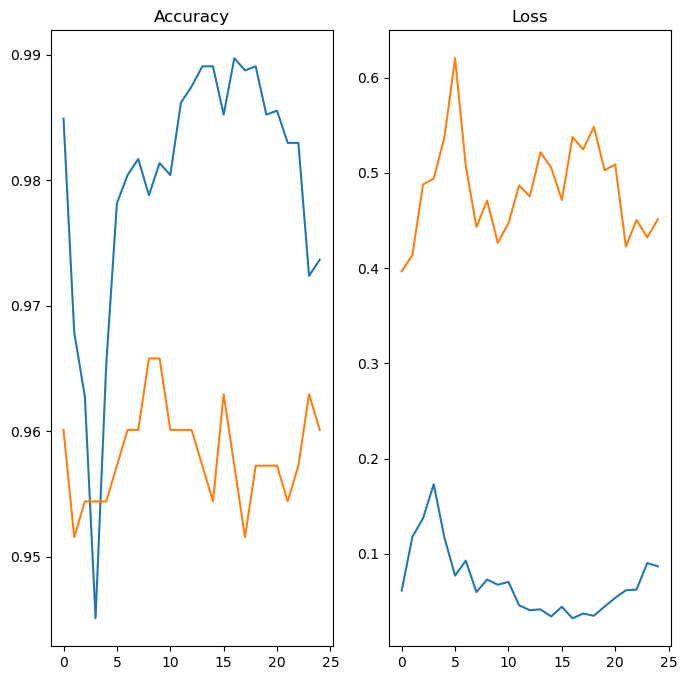

In [70]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8, 8))

# İlk subplot (Accuracy)
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
plt.plot(epochs_range, hist.history["accuracy"], label="Training Accuracy")
plt.plot(epochs_range, hist.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")


# İkinci subplot (Loss)
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
plt.plot(epochs_range, hist.history["loss"], label="Training Loss")
plt.plot(epochs_range, hist.history["val_loss"], label="Validation Loss")
plt.title("Loss")





In [81]:
image="Banana.jpg"
image= tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [83]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [85]:
score= tf.nn.softmax(predict)

In [87]:
print("Veg/Fruit in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 99.99


In [89]:
model.save("Image_classify.keras")